In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.shape

(891, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_train.shape

(712, 3)

In [11]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [12]:
X_train['Age'].dropna().shape

(564,)

In [13]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# .values kiya kyuki se series ata he usko numpy array me convert kardiya

array([20. ,  9. , 50. , 29. , 12. , 20. , 70.5, 28. , 58. , 30. , 52. ,
       60. , 20. , 38. , 47. , 42. , 16. , 23. , 29. ,  4. , 54. , 28. ,
       11. , 29. , 43. , 48. , 29. , 24. , 35. , 40. , 47. , 46. , 16. ,
       16. , 35. , 20. , 39. , 33. , 24. , 30. , 42. , 16. , 40. , 27. ,
       63. , 19. , 41. , 26. , 19. , 17. ,  8. , 50. , 46. , 31. , 40. ,
       26. , 27. ,  7. , 34. , 20. , 28. , 32. , 35. , 28. , 21. , 27. ,
       14. , 26. , 54. , 25. , 30. , 36. , 31. , 39. , 20. , 26. ,  9. ,
       32. , 44. , 45. , 20. , 66. , 23. ,  2. , 28. , 23. , 16. ,  2. ,
       40. , 27. , 27. ,  3. ,  4. , 22. , 28. , 28. , 51. , 42. , 38. ,
       58. , 19. , 29. , 22. , 21. , 39. , 22. , 14. , 17. , 28. , 40. ,
       27. , 54. , 29. , 24. , 25. , 44. , 35. , 24. , 17. , 27. , 41. ,
       22. , 32. , 19. , 30. , 34. , 56. , 64. , 31. , 45. ,  2. , 34. ,
       35. , 18. , 19. , 47. ,  4. , 23. , 61. , 16. , 42. ,  3. , 16. ,
       32. , 21. , 24. , 13. , 35. ])

In [14]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [15]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,46.0


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


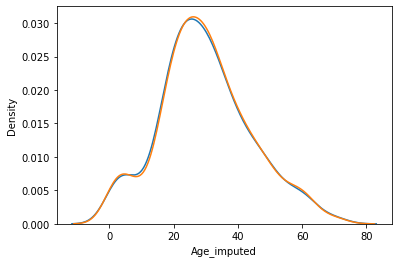

In [16]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend
plt.show()

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.04811965106907


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,54.268935
Age,71.512440,204.349513,204.349513
Age_imputed,54.268935,204.349513,204.048120


In [19]:
X_train[['Fare', 'Age', 'Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.095814,0.078068
Age,0.095814,1.000000,1.000000
Age_imputed,0.078068,1.000000,1.000000


<AxesSubplot:>

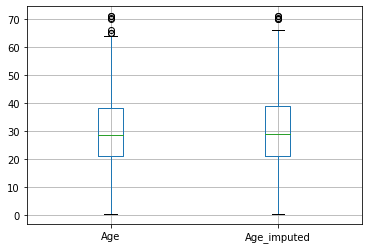

In [20]:
X_train[['Age', 'Age_imputed']].boxplot()

In [21]:
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'])) this wrong
# it is done inorder to match the same random input for the same given input
# Ex - fare 50 aur ek baar generate hua 40 toh agli baar bhi 40 hi ana chahiye 50 ke liye

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [25]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [27]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
148,NaN,NaN,141000,NaN,NaN
779,NaN,TA,135000,TA,NaN
1357,Fa,TA,149900,TA,Fa
566,Gd,TA,325000,TA,Gd
745,TA,TA,299800,TA,TA


In [28]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\mynam\AppData\Local\Temp/ipykernel_5752/856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\mynam\AppData\Local\Temp/ipykernel_5752/856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\mynam\AppData\Local\Temp/ipykernel_5752/856878696.py:4: SettingWithCopyWarning: 
A value

In [29]:
X_train.shape

(1168, 5)

In [30]:
X_train.GarageQual.value_counts().sum()

1103

In [31]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [32]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.040240
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [33]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.545455
Fa,0.040917,0.052750
Po,0.027823,0.034792
Ex,0.024550,0.033670


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

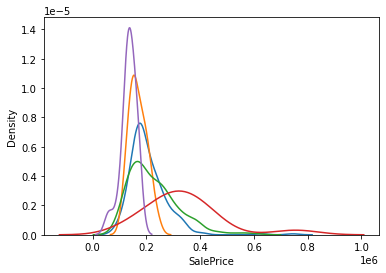

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

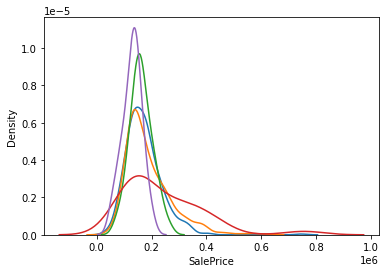

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()